In [1]:
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize
import math
import matplotlib.pyplot as plt

In [2]:
# Create synthetic data assuming the following values for theta
Theta_Guess = np.array([1,-1])

In [3]:
# Evaluate model and add noise based on assumed theta values
# This generates experimental data points

Xexp = np.array([-2,-1,0,1,2])

noise_mean = 0
noise_std = 0.1**2
noise = np.random.normal(size=len(Xexp),loc = noise_mean, scale = noise_std)

Yexp = Theta_Guess[0]*Xexp + Theta_Guess[1]*Xexp**2 + Xexp**3 + noise

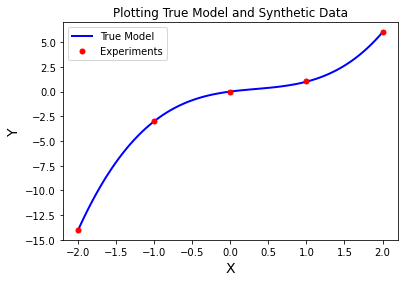

In [4]:
# Evaluate model based on the assumed experimental values
X = np.linspace(np.min(Xexp),np.max(Xexp),100)
Y = Theta_Guess[0]*X + Theta_Guess[1]*X**2 + X**3

# Compare the experiments to the true model
plt.plot(X,Y,'b-',linewidth=2,label="True Model")
plt.plot(Xexp,Yexp,'r.',markersize=10,label="Experiments")
plt.title("Plotting True Model and Synthetic Data")
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.legend()
plt.show()

In [5]:
## define function that includes nonlinear model
def model(theta,x):
    '''
    Toy model
    Arguments:
        theta: parameter vector
        x: independent variable vector
    Returns:
        y_model: dependent variable prediction
    '''
    y_model = theta[0]*x + theta[1]*x**2 + x**3
    return y_model

print(model(Theta_Guess,Xexp))

[-14  -3   0   1   6]


In [6]:
# Create a function to optimize, in this case, least squares fitting
def regression_func(theta, x, y):
    '''
    Function to define regression function for least-squares fitting
    Arguments:
        theta: parameter vector
        x: independent variable vector
        y: dependent variable vector (measurements)
    Returns:
        e: residual vector
    '''
    
    error = (y - model(theta,x))**2;
    
    return error

In [7]:
## specify initial guess
theta0 = Theta_Guess

## specify bounds
# first array: lower bounds
# second array: upper bounds
bounds = ([-np.inf, -np.inf], [np.inf, np.inf])

## use least squares optimizer in scipy
# argument 1: function that takes theta as input, returns residual
# argument 2: initial guess for theta
# optional arguments 'bounds': bounds for theta
# optional arugment 'args': additional arguments to pass to residual function
# optional argument 'method': select the numerical method
#   if you want to consider bounds, choose 'trf'
#   if you do not want to consider bounds, try either 'lm' or 'trf'
Solution = optimize.least_squares(regression_func, theta0,bounds=bounds, method='trf',args=(Xexp, Yexp))

theta = Solution.x
print("theta = ",theta)

theta =  [ 1.00382448 -0.99877719]


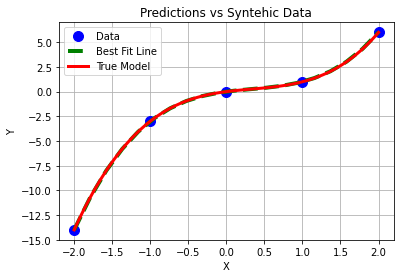

In [8]:
# generate predictions
X_pred = np.linspace(np.min(Xexp),np.max(Xexp),20)
Y_pred = model(theta, X_pred)

# create plot and compare predictions and experiments
plt.plot(Xexp,Yexp,'.b',markersize=20,label='Data')
plt.plot(X_pred,Y_pred,'--g',linewidth=4,label='Best Fit Line')
plt.plot(X,Y,'r-',linewidth=3,label='True Model')
plt.title("Predictions vs Syntehic Data")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

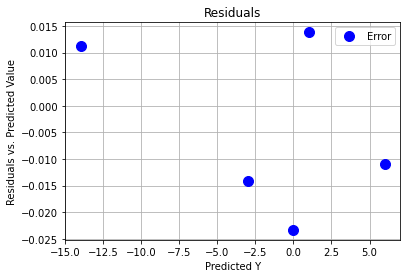

In [9]:
#Plot error
Y_pred2 = model(theta,Xexp)
error = (Yexp - Y_pred2)
plt.plot(Y_pred2,error,"b.",markersize=20, label = "Error")
plt.title("Residuals")
plt.xlabel('Predicted Y')
plt.ylabel('Residuals vs. Predicted Value')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
#Jacobian and Uncertainty Analysis
print("Jacobian =\n")
print(Solution.jac)
sigre = (error.T @ error)/(len(error) - 2)
Sigma_theta2 = sigre * np.linalg.inv(Solution.jac.T @ Solution.jac)
print("Covariance matrix:\n",Sigma_theta2)

Jacobian =

[[ 0.04461331 -0.08922674]
 [-0.02825687  0.02825687]
 [ 0.         -0.        ]
 [-0.02766581 -0.02766584]
 [ 0.04414011  0.08827986]]
Covariance matrix:
 [[0.07161145 0.00048408]
 [0.00048408 0.02275272]]


In [11]:
#Create a function to define the SSE for any Theta vector on a heat map.
def sse_func(xx, yy, x, y):
    '''
    Function to define define sum of squared error function for heat map
    Arguments:
        xx: An N X D array of all Theta1 values
            
        yy: An D X N array of all Theta2 values
        theta: parameter vector
        x: independent variable vector (predicted x values including noise)
        y: dependent variable vector (predicted y values on Heat Map)
    Returns:
        sse: N x N sum of squared error matrix of all generated combination of xx and yy
    '''
    sse = np.zeros([len(xx),len(yy)])
    
    for i in range(len(xx)):
        for j in range(len(yy)):
            theta = np.array([xx[i][j],yy[i][j]])
            sse[i][j] = sum((y - model(theta,x))**2) 
    
    return sse


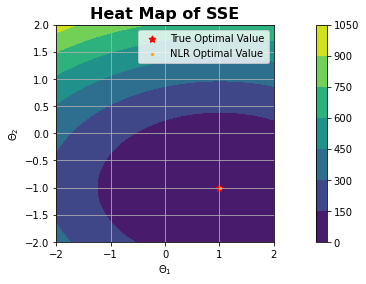

In [12]:
Theta1_Map = np.linspace(-2,2,100)
Theta2_Map = np.linspace(-2,2,100)

x = Theta1_Map
y = Theta2_Map

# full coorindate arrays
xx, yy = np.meshgrid(x, y)
zz = sse_func(xx,yy,X_pred,Y_pred)

plt.contourf(x, y, zz)
plt.colorbar()
plt.scatter(Theta_Guess[0],Theta_Guess[1], color="red", label = "True Optimal Value",s=50, marker = (5,1))
plt.scatter(theta[0],theta[1], color="orange", label = "NLR Optimal Value", s=20,marker = ".")
plt.axis('scaled')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('$\Theta_1$',weight='bold')
plt.ylabel('$\Theta_2$',weight='bold')
plt.title('Heat Map of SSE', weight='bold',fontsize = 16)
plt.show()